#Load Dataset

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import library

In [22]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator



#Load Directories

In [23]:
dataset_dir = f'/content/drive/MyDrive/Food dataset'
train_dir = os.path.join(dataset_dir, "train")
validation_dir = os.path.join(dataset_dir, "validation")
test_dir = os.path.join(dataset_dir, "test")

#List Image Class

In [24]:
def daftar_gambar():
  classes_dirs = os.listdir(train_dir)
  for label in classes_dirs:
    train_classes = os.listdir(os.path.join(train_dir, label))
    validation_classes = os.listdir(os.path.join(validation_dir, label))
    test_classes = os.listdir(os.path.join(test_dir, label))
    print(f"{label}: \n \t{len(train_classes)} train images,{len(validation_classes)} validation images, and {len(test_classes)} test images,total {len(train_classes) + len(validation_classes) + len(test_classes)} images")
    print()
daftar_gambar()

tomat: 
 	92 train images,10 validation images, and 10 test images,total 112 images

wortel: 
 	82 train images,9 validation images, and 10 test images,total 101 images

ubi: 
 	69 train images,10 validation images, and 10 test images,total 89 images

sayap ayam: 
 	50 train images,10 validation images, and 10 test images,total 70 images

pokcoy: 
 	50 train images,10 validation images, and 10 test images,total 70 images

salmon: 
 	50 train images,10 validation images, and 10 test images,total 70 images

telur: 
 	60 train images,10 validation images, and 10 test images,total 80 images

tempe: 
 	50 train images,10 validation images, and 10 test images,total 70 images

selada: 
 	97 train images,9 validation images, and 10 test images,total 116 images

tauge: 
 	50 train images,10 validation images, and 10 test images,total 70 images

terong: 
 	84 train images,10 validation images, and 10 test images,total 104 images

tahu: 
 	50 train images,10 validation images, and 10 test images,

#Data Preprocessing

##Training Image preprocessing

In [25]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Food dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3327 files belonging to 46 classes.


##Validation Image Preprocessing

In [26]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Food dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 450 files belonging to 46 classes.


#Building Model

#Building Convolution Layer

In [27]:
model = tf.keras.models.Sequential()

In [28]:
# Lapisan konvolusi
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))



In [29]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512,activation='relu'))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [30]:
model.add(tf.keras.layers.Dropout(0.5))

In [31]:
# Lapisan output
model.add(tf.keras.layers.Dense(units=46, activation='softmax')) #use softmax cause multiclass cllasofication

#Compiling and Training Phase

In [32]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
#callback
class Akhir(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.91 and logs.get('val_accuracy') > 0.91):
            self.model.stop_training = True

In [34]:
# Tampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                 

In [35]:
callback = Akhir()

In [36]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=40,callbacks=[callback])

Epoch 1/40
104/104 [==============================] - 80s 631ms/step - loss: 6.0230 - accuracy: 0.0361 - val_loss: 3.8156 - val_accuracy: 0.0467
Epoch 2/40
104/104 [==============================] - 74s 661ms/step - loss: 3.7761 - accuracy: 0.0364 - val_loss: 3.6852 - val_accuracy: 0.0756
Epoch 3/40
104/104 [==============================] - 70s 631ms/step - loss: 3.7400 - accuracy: 0.0490 - val_loss: 3.7981 - val_accuracy: 0.0533
Epoch 4/40
104/104 [==============================] - 71s 625ms/step - loss: 3.6395 - accuracy: 0.0670 - val_loss: 3.6278 - val_accuracy: 0.1333
Epoch 5/40
104/104 [==============================] - 72s 647ms/step - loss: 3.4870 - accuracy: 0.1001 - val_loss: 3.3496 - val_accuracy: 0.1956
Epoch 6/40
104/104 [==============================] - 74s 652ms/step - loss: 3.2760 - accuracy: 0.1458 - val_loss: 3.1539 - val_accuracy: 0.2356
Epoch 7/40
104/104 [==============================] - 72s 636ms/step - loss: 3.0413 - accuracy: 0.2038 - val_loss: 2.8475 - val_ac

#Evaluating Model

In [39]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

104/104 [==============================] - 68s 578ms/step - loss: 0.2101 - accuracy: 0.9414
Training accuracy: 0.9413886666297913


In [41]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

15/15 [==============================] - 12s 358ms/step - loss: 4.0688 - accuracy: 0.6422
Validation accuracy: 0.6422222256660461


##Saving Model

In [42]:
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
training_history.history #Return Dictionary of history

{'loss': [6.022984981536865,
  3.7760777473449707,
  3.739975690841675,
  3.6394870281219482,
  3.486984968185425,
  3.2760488986968994,
  3.041304111480713,
  2.7196176052093506,
  2.4074244499206543,
  2.1222167015075684,
  1.8281266689300537,
  1.7440013885498047,
  1.4755957126617432,
  1.38797926902771,
  1.2199714183807373,
  1.1177819967269897,
  1.0233395099639893,
  0.9872309565544128,
  0.9818176031112671,
  0.9059274196624756,
  0.8402780294418335,
  0.7814513444900513,
  0.7463662028312683,
  0.7460230588912964,
  0.7228971123695374,
  0.6610908508300781,
  0.5976511240005493,
  0.6044623851776123,
  0.6017355918884277,
  0.6752792596817017,
  0.4991813898086548,
  0.5175942778587341,
  0.5066794753074646,
  0.5036892294883728,
  0.4368704855442047,
  0.49597427248954773,
  0.5019379258155823,
  0.42830631136894226,
  0.34522590041160583,
  0.32981306314468384],
 'accuracy': [0.03606852889060974,
  0.03636910021305084,
  0.04899308830499649,
  0.06702735275030136,
  0.10009

In [44]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [45]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [46]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 64.22222256660461 %


#Accuracy Visualization

##Training Visualization

In [47]:
#training_history.history['accuracy']

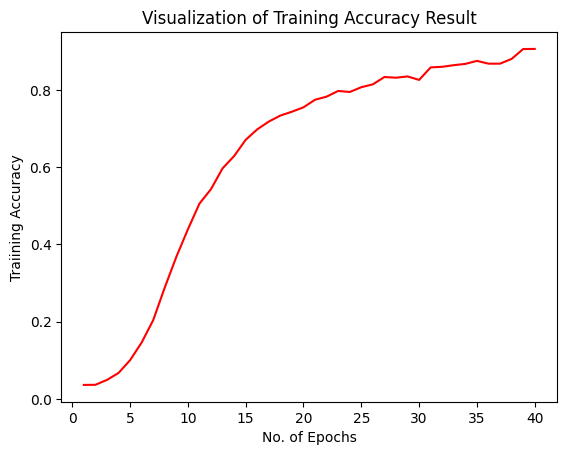

In [53]:
epochs = [i for i in range(1,41)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


##Validation Accuracy

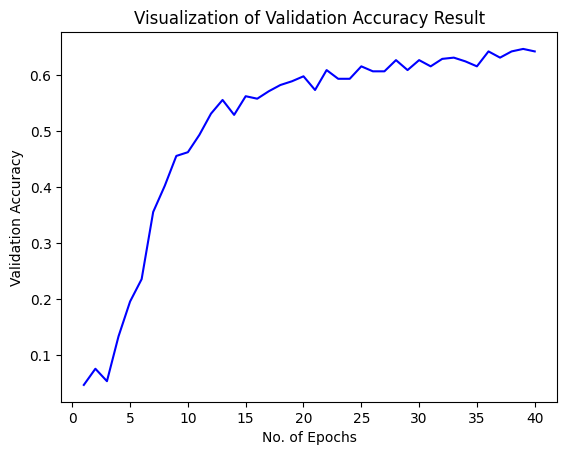

In [54]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [56]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Food dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 450 files belonging to 46 classes.


In [58]:
test_loss,test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

15/15 [==============================] - 56s 1s/step - loss: 3.9650 - accuracy: 0.6400
Test accuracy: 0.6399999856948853
